In [32]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

<IPython.core.display.Javascript object>


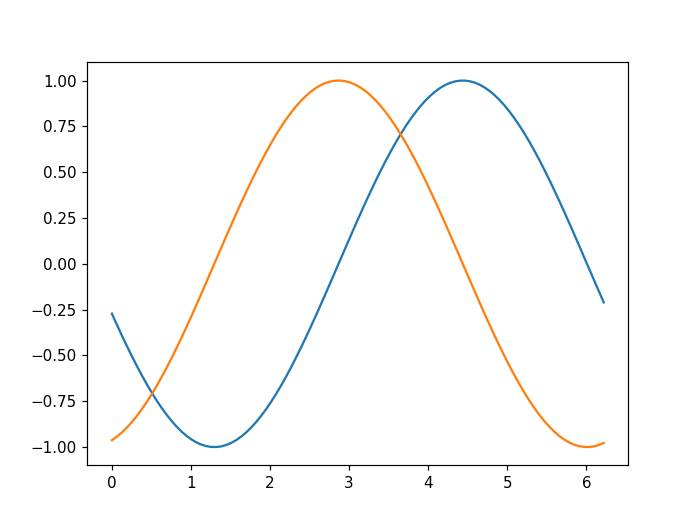

In [128]:
fig, ax = plt.subplots()
x = np.linspace(0, 2*np.pi, 100, endpoint=False)
line1, = ax.plot(x, np.sin(x))
line2, = ax.plot(x, np.cos(x))

def animate_func(i):
    line1.set_ydata(np.sin(x+i/10))
    line2.set_ydata(np.cos(x+i/10))
    return  

def init():
    line1.set_ydata(np.sin(x))
    line2.set_ydata(np.cos(x))
    return 

ani = FuncAnimation(fig=fig, func=animate_func, frames=100, init_func=init, interval=10)

plt.show()

<IPython.core.display.Javascript object>


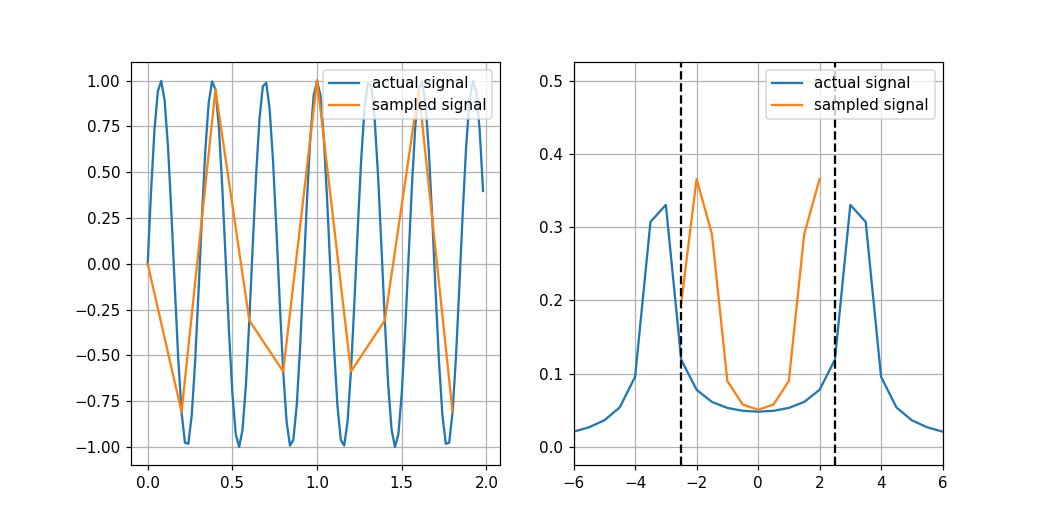

In [129]:
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.fftpack import fft, fftshift, fftfreq

fs = 5
T = 2
x = np.arange(0, T, 1/fs)
x_high = np.arange(0, T, 1/(fs*10))
f = 2

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, sharey=False)
y_high = np.sin(2*np.pi*x_high*f)
y = np.sin(2*np.pi*x*f)
line1, = ax1.plot(x_high, y_high, label="actual signal")
line2, = ax1.plot(x, y, label="sampled signal")
# line3 = ax1.bar(x, y, label="sampled points", width=0.05)
ax1.set_ylim([-1.1, 1.1])
ax1.legend(loc="upper right")
ax1.grid()

N_t = len(y_high)
fft_true = fft(y_high)
abstrue = np.abs(fft_true)/N_t
ftrue = fftshift(abstrue)
ft = fftshift(fftfreq(N_t, 1/(fs*10)))

N_a = len(y)
fft_alias = fft(y)
absalias = np.abs(fft_alias)/N_a
falias = fftshift(absalias)
fa = fftshift(fftfreq(N_a, 1/fs))

f1, = ax2.plot(ft, ftrue, label="actual signal")
f2, = ax2.plot(fa, falias, label="sampled signal")
ax2.legend(loc="upper right")
ax2.grid()
ax2.set_xlim([-6, 6])
ax2.axvline(fs/2, color='k', ls='--')
ax2.axvline(-fs/2, color='k', ls='--')

fig.set_size_inches(6.4*1.5, 4.8)

def animate(i):
    y_high = np.sin(2*np.pi*x_high*(i+2)*1/16)
    y = np.sin(2*np.pi*x*(i+2)*1/16)
    
    line1.set_ydata(y_high)
    line2.set_ydata(y)
#     line3.set_ydata(np.sin(2*np.pi*x*(i+2)*0.25))
    f1.set_ydata(fftshift(np.abs(fft(y_high))/N_t))
    f2.set_ydata(fftshift(np.abs(fft(y))/N_a))
    

def init():
    line1.set_ydata(np.sin(2*np.pi*x_high*1/16))
    line2.set_ydata(np.sin(2*np.pi*x*1/16))
#     line3.set_ydata(np.sin(2*np.pi*x*0.25))
    f1.set_ydata(ftrue)
    f2.set_ydata(falias)
    
ani = FuncAnimation(fig=fig, func=animate, init_func=init, frames=80, interval=500)

plt.show()